<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-로드" data-toc-modified-id="데이터-로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 로드</a></span></li><li><span><a href="#데이터-살펴보기" data-toc-modified-id="데이터-살펴보기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 살펴보기</a></span></li><li><span><a href="#데이터-처리" data-toc-modified-id="데이터-처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 처리</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></li><li><span><a href="#모델링" data-toc-modified-id="모델링-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>모델링</a></span><ul class="toc-item"><li><span><a href="#모델-선택" data-toc-modified-id="모델-선택-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>모델 선택</a></span></li><li><span><a href="#모델-학습" data-toc-modified-id="모델-학습-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>모델 학습</a></span></li><li><span><a href="#예측" data-toc-modified-id="예측-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>예측</a></span></li><li><span><a href="#predict-시각화---다음-시간에-마저-해주시는-걸로!" data-toc-modified-id="predict-시각화---다음-시간에-마저-해주시는-걸로!-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>predict 시각화 - 다음 시간에 마저 해주시는 걸로!</a></span></li></ul></li><li><span><a href="#실습-2" data-toc-modified-id="실습-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>실습 2</a></span><ul class="toc-item"><li><span><a href="#가설설정" data-toc-modified-id="가설설정-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>가설설정</a></span></li></ul></li></ul></div>

# 데이터 로드

In [6]:
import pandas as pd
train = pd.read_csv('./따릉이 data/train.csv')
test = pd.read_csv('./따릉이 data/test.csv')
submission = pd.read_csv('./따릉이 data/sample_submission.csv')

random_state를 설정 안하고 실행한 것 같아서 점수가 다르게 나올 것 같습니다.
오히려 private점수가 더 잘 나오는 다른 코드가 복원되게되면 어떡할까요?

random_state를 설정 안하고 실행한 것 같아서 점수가 다르게 나올 것 같습니다.
오히려 private점수가 더 잘 나오는 다른 코드를 복원하여 제출하게되면 어떻게 되나요?

In [4]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [8]:
# 평균값 넣어보기
submission['number_of_rentals'] = train['number_of_rentals'].mean()
submission.head()

,date_time,number_of_rentals
0,2021-04-01,59574.978022
1,2021-04-02,59574.978022
2,2021-04-03,59574.978022
3,2021-04-04,59574.978022
4,2021-04-05,59574.978022


In [10]:
# 정답파일 저장 & 제출
submission.to_csv('submission while 5차 교육.csv', index = False)

# 데이터 살펴보기

# 데이터 처리

## Feature Engineering

In [11]:
# drop() 메소드를 이용하여 열 (date_time) 제거
train = train.drop('date_time', axis = 1)
test = test.drop('date_time', axis = 1)

## Feature Selection

In [12]:
train.columns

Index(['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability',
       'number_of_rentals'],
      dtype='object')

In [13]:
# 독립변수 = Feature = X
# 종속변수 = Target = y

# 학습에 사용할 변수 X로 할당
X = train[['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability']]

# X 데이터 확인
X.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378


In [15]:
# y 할당

y = train[['number_of_rentals']]

# y 데이터 확인
y.head()

,number_of_rentals
0,22994
1,28139
2,26817
3,26034
4,2833


In [ ]:
# Feature engineering, Feature Selection ==> 데이터 처리

# 후에 모델링 진행
## 모델링 과정에 validation (검증)이 있지만 다음 PBL에서 진행할 예정임.

# <모델링 과정>
# 모델 정의 model = 모델()
# 모델 학습 model.fit(X,y)
# 예측 model.predict(test[features])
# 검증 by 시각화 plt.plot(predcit)
     # plt.show()
## 시각화는 그냥 분포가 유의미 한지 정도만 알아보는 정도로 사용.

# 모델링

## 모델 선택

In [16]:
from sklearn.tree import DecisionTreeRegressor

# 모델 선언
model = DecisionTreeRegressor()

## 모델 학습

In [17]:
# 모델 학습
model.fit(X, y) # 순서대로 독립 종속

DecisionTreeRegressor()

## 예측

In [18]:
predict = model.predict(test)

In [19]:
print('-----------예측된 데이터 상위 10개의 값 확인')
print(predict[:10])

-----------예측된 데이터 상위 10개의 값 확인
[88257.  8095. 34593. 24560. 73647. 77149. 89789. 74856. 73647. 68414.]


## predict 시각화 - 다음 시간에 마저 해주시는 걸로!

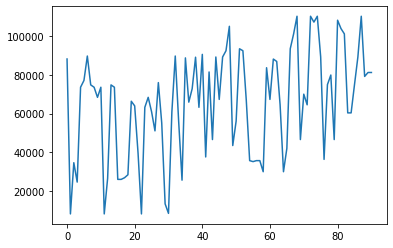

In [21]:
import matplotlib.pyplot as plt

# x = train['number_of_rentals'].index
plt.plot(predict)

In [ ]:
# submission['number_of_rentals'] = predict
# submission.to_csv('submission_while_5차교육_worse.csv', index = False)

In [ ]:
# 평균값으로 제출한 것 보다 결과가 좋지 않았음.

# 실습 2
- EDA (what's EDA? & extract insight) <br>
: 데이터에 대한 이해를 위해 feature engineering 전에 실행해야함. <br>
패턴, 인사이트 발굴, 가설설정 <br>

- 모델링2
- 제출2

## 가설설정
1. 따릉이 대여량은 강수 여부에 큰 영향을 받을 것이다.
2. 풍속이 강한 날은 따릉이를 타기 힘들기 때문에 대여량이 적을 것이다.
3. 최저 기온이 낮은 날은 외출을 꺼리기 때문에 대여량이 적을 것이다.


가설설정을 통한 검정, (???????)

회귀문제는 타겟이 굉장히 중요함.

